In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [2]:
df = pd.read_csv(r"C:\Users\Swapna\Downloads\P587 DATASET.xls")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

data = df[['Close']]
data.head()


,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


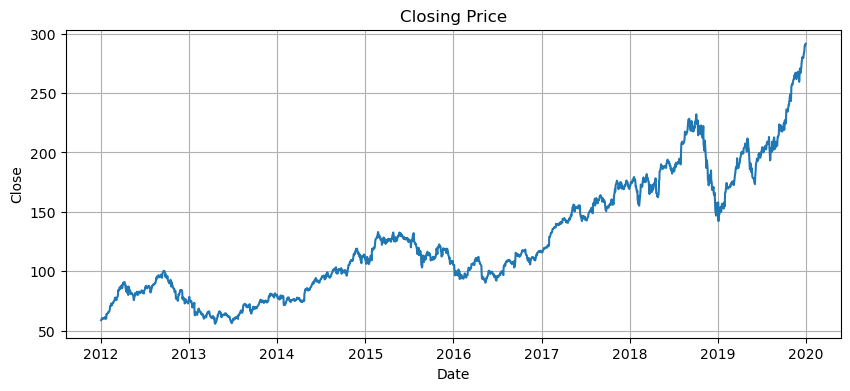

In [4]:
plt.figure(figsize=(10,4))
plt.plot(data.index, data['Close'])
plt.title("Closing Price")
plt.xlabel("Date")
plt.ylabel("Close")
plt.grid(True)
plt.show()


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)



In [6]:
def create_sequences(dataset, look_back):
    X, y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i - look_back:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

look_back = 60
X, y = create_sequences(scaled_data, look_back)


In [7]:
X = X.reshape(X.shape[0], X.shape[1], 1)

#(samples, time_steps, features)


In [8]:
X

array([[[0.01254462],
        [0.01388393],
        [0.01666555],
        ...,
        [0.13117306],
        [0.13571824],
        [0.13762114]],

       [[0.01388393],
        [0.01666555],
        [0.01931386],
        ...,
        [0.13571824],
        [0.13762114],
        [0.13291841]],

       [[0.01666555],
        [0.01931386],
        [0.01890783],
        ...,
        [0.13762114],
        [0.13291841],
        [0.12667035]],

       ...,

       [[0.71607349],
        [0.69219028],
        [0.70008066],
        ...,
        [0.94875498],
        [0.96809914],
        [0.96924447]],

       [[0.69219028],
        [0.70008066],
        [0.72633947],
        ...,
        [0.96809914],
        [0.96924447],
        [0.99317022]],

       [[0.70008066],
        [0.72633947],
        [0.72655159],
        ...,
        [0.96924447],
        [0.99317022],
        [0.99270351]]])

In [9]:
X.shape


(1951, 60, 1)

In [10]:
# train-test split

train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [11]:
# Build LSTM model
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\Swapna\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Train the model
model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)



Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - loss: 0.0091 - val_loss: 0.0016
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 7.8152e-04 - val_loss: 0.0011
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 8.4435e-04 - val_loss: 0.0011
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 7.9349e-04 - val_loss: 0.0012
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 7.9476e-04 - val_loss: 0.0014
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 7.1110e-04 - val_loss: 0.0010
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 7.6074e-04 - val_loss: 0.0020
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 6.8402e-04 - val_loss: 0.0013
Epoch 12/20
49/49 ━━━━━━━━━━━━━━━

In [13]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(y_test_actual, test_pred))
print("Test RMSE:", rmse)
r2_s=np.sqrt(r2_score(y_test_actual, test_pred))
print("Test R2:", r2_s)



49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Test RMSE: 6.400682204968522
Test R2: 0.9774710093305613


In [14]:
def predict_future_days(model, scaled_data, look_back, n_days):
    future_preds = []

    current_input = scaled_data[-look_back:].reshape(1, look_back, 1)

    for _ in range(n_days):
        next_pred = model.predict(current_input, verbose=0)
        future_preds.append(next_pred[0, 0])

        current_input = np.append(
            current_input[:, 1:, :],
            [[[next_pred[0, 0]]]],
            axis=1
        )

    return future_preds


In [15]:
n_days = 30   # change to 10, 15, 20, etc.


In [16]:
future_scaled = predict_future_days(
    model=model,
    scaled_data=scaled_data,
    look_back=look_back,
    n_days=n_days
)

future_prices = scaler.inverse_transform(
    np.array(future_scaled).reshape(-1, 1)
)



In [17]:
last_date = data.index[-1]

future_dates = pd.date_range(
    start=last_date + pd.Timedelta(days=1),
    periods=n_days,
    freq='B'   # business days
)


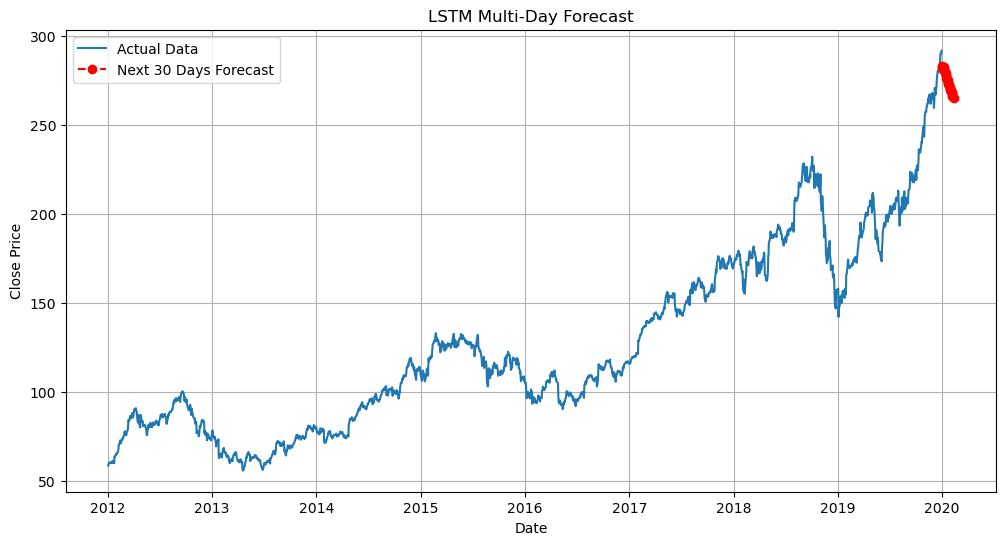

In [18]:
plt.figure(figsize=(12,6))

plt.plot(data.index, data['Close'], label="Actual Data")

plt.plot(
    future_dates,
    future_prices,
    linestyle='--',
    marker='o',
    color='red',
    label=f"Next {n_days} Days Forecast"
)

plt.title("LSTM Multi-Day Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
future_df = pd.DataFrame(
    future_prices,
    index=future_dates,
    columns=["Predicted Close"]
)

print(future_df)



            Predicted Close
2019-12-31       281.639557
2020-01-01       282.428894
2020-01-02       282.692780
2020-01-03       282.583191
2020-01-06       282.218628
2020-01-07       281.684906
2020-01-08       281.042358
2020-01-09       280.332458
2020-01-10       279.583313
2020-01-13       278.813690
2020-01-14       278.035736
2020-01-15       277.257599
2020-01-16       276.484467
2020-01-17       275.719757
2020-01-20       274.965698
2020-01-21       274.223755
2020-01-22       273.494781
2020-01-23       272.779297
2020-01-24       272.077545
2020-01-27       271.389587
2020-01-28       270.715332
2020-01-29       270.054474
2020-01-30       269.406830
2020-01-31       268.771912
2020-02-03       268.149384
2020-02-04       267.538696
2020-02-05       266.939514
2020-02-06       266.351257
2020-02-07       265.773590
2020-02-10       265.205933


In [20]:
#model.save("lstm_model.h5")


In [21]:
#import joblib

#joblib.dump(scaler, "scaler.save")
